In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('C:/Data Science/20 July (multiple Rgression)/50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape

(50, 5)

In [5]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
processed_data=df.drop('State',axis=1)
processed_data

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [7]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [8]:
processed_data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [9]:
processed_data.shape

(50, 4)

In [10]:
train,test=train_test_split(processed_data,train_size=0.8)

In [11]:
train.shape

(40, 4)

In [12]:
test.shape

(10, 4)

In [13]:
train.head()

,R&D Spend,Administration,Marketing Spend,Profit
33,55493.95,103057.49,214634.81,96778.92
34,46426.07,157693.92,210797.67,96712.80
6,134615.46,147198.87,127716.82,156122.51
4,142107.34,91391.77,366168.42,166187.94
19,86419.70,153514.11,0.00,122776.86


In [14]:
X_train=train.drop('Profit',axis=1)

In [15]:
X_train

,R&D Spend,Administration,Marketing Spend
33,55493.95,103057.49,214634.81
34,46426.07,157693.92,210797.67
6,134615.46,147198.87,127716.82
4,142107.34,91391.77,366168.42
19,86419.70,153514.11,0.00
1,162597.70,151377.59,443898.53
24,77044.01,99281.34,140574.81
2,153441.51,101145.55,407934.54
43,15505.73,127382.30,35534.17
31,61136.38,152701.92,88218.23


In [16]:
y_train=train['Profit']
y_train

33     96778.92
34     96712.80
6     156122.51
4     166187.94
19    122776.86
1     191792.06
24    108552.04
2     191050.39
43     69758.98
31     97483.56
9     149759.96
41     77798.83
23    108733.99
8     152211.77
21    111313.02
5     156991.12
26    105733.54
0     192261.83
30     99937.59
37     89949.14
44     65200.33
36     90708.19
7     155752.60
20    118474.03
38     81229.06
47     42559.73
48     35673.41
13    134307.35
39     81005.76
32     97427.84
11    144259.40
18    124266.90
10    146121.95
29    101004.64
28    103282.38
22    110352.25
16    126992.93
27    105008.31
35     96479.51
46     49490.75
Name: Profit, dtype: float64

In [17]:
X_test=test.drop('Profit',axis=1)

In [18]:
y_test=test['Profit']

In [19]:
X_train.shape,y_train.shape

((40, 3), (40,))

In [20]:
X_test.shape,y_test.shape

((10, 3), (10,))

In [21]:
scalar=MinMaxScaler(feature_range=(0, 1))

In [22]:
X_train_scaled=scalar.fit_transform(X_train)
X_train_scaled

array([[0.33561668, 0.39413365, 0.45494286],
       [0.2807759 , 0.81005496, 0.44680961],
       [0.81412828, 0.73016111, 0.27071031],
       [0.85943772, 0.30532804, 0.77613557],
       [0.52264964, 0.77823604, 0.        ],
       [0.98335946, 0.76197173, 0.94089337],
       [0.46594728, 0.3653876 , 0.29796428],
       [0.92798459, 0.37957895, 0.8646636 ],
       [0.09377566, 0.57930693, 0.07531871],
       [0.36974101, 0.77205322, 0.18698856],
       [0.74590551, 0.43692884, 0.64644319],
       [0.16869099, 0.25446874, 0.34861436],
       [0.40842369, 0.4146383 , 0.64599195],
       [0.72901786, 0.74173276, 0.66049977],
       [0.47408436, 0.78021012, 0.63532724],
       [0.797566  , 0.3694479 , 0.76912588],
       [0.45557444, 0.70684477, 0.28413435],
       [1.        , 0.65174393, 1.        ],
       [0.37493063, 0.48992809, 0.19316302],
       [0.26652654, 0.        , 0.41762624],
       [0.13412668, 0.78807166, 0.06005866],
       [0.17335288, 0.57682456, 0.42631115],
       [0.

In [23]:
a=X_train.columns

In [24]:
a

Index(['R&D Spend', 'Administration', 'Marketing Spend'], dtype='object')

In [25]:
X_train=pd.DataFrame(X_train_scaled,columns=a)
X_train

,R&D Spend,Administration,Marketing Spend
0,0.335617,0.394134,0.454943
1,0.280776,0.810055,0.446810
2,0.814128,0.730161,0.270710
3,0.859438,0.305328,0.776136
4,0.522650,0.778236,0.000000
5,0.983359,0.761972,0.940893
6,0.465947,0.365388,0.297964
7,0.927985,0.379579,0.864664
8,0.093776,0.579307,0.075319
9,0.369741,0.772053,0.186989


In [26]:
X_test_scaled=scalar.fit_transform(X_test)
X_test_scaled

array([[0.65015019, 0.51577021, 0.65024472],
       [0.19916776, 0.37039825, 0.44818692],
       [1.        , 0.37248249, 1.        ],
       [0.79325136, 0.43784257, 0.68155058],
       [0.65564577, 0.80996919, 0.73609639],
       [0.00692812, 0.46329413, 0.        ],
       [0.83079059, 1.        , 0.66774683],
       [0.44790213, 0.71844131, 0.35683249],
       [0.16374964, 0.        , 0.3831598 ],
       [0.        , 0.3445151 , 0.1134792 ]])

In [27]:
b=X_test.columns
b

Index(['R&D Spend', 'Administration', 'Marketing Spend'], dtype='object')

In [28]:
X_test=pd.DataFrame(X_test_scaled,columns=b)
X_test

,R&D Spend,Administration,Marketing Spend
0,0.650150,0.515770,0.650245
1,0.199168,0.370398,0.448187
2,1.000000,0.372482,1.000000
3,0.793251,0.437843,0.681551
4,0.655646,0.809969,0.736096
5,0.006928,0.463294,0.000000
6,0.830791,1.000000,0.667747
7,0.447902,0.718441,0.356832
8,0.163750,0.000000,0.383160
9,0.000000,0.344515,0.113479


In [29]:
rmse=[]
for k in range(20):
    k=k+1
    model=KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    error=sqrt(mean_squared_error(y_test,pred))
    rmse.append(error)
    print('RMSE value for k= ',k,'is-',error)
    

RMSE value for k=  1 is- 23683.03301402546
RMSE value for k=  2 is- 24469.642271961085
RMSE value for k=  3 is- 22146.50273423752
RMSE value for k=  4 is- 19980.989297522654
RMSE value for k=  5 is- 19279.515430294196
RMSE value for k=  6 is- 19629.4847629735
RMSE value for k=  7 is- 21320.8493045106
RMSE value for k=  8 is- 22229.9191719791
RMSE value for k=  9 is- 23161.880904437097
RMSE value for k=  10 is- 24029.279955876264
RMSE value for k=  11 is- 23810.1813607632
RMSE value for k=  12 is- 24500.536752533324
RMSE value for k=  13 is- 25600.19492133126
RMSE value for k=  14 is- 26330.883567840072
RMSE value for k=  15 is- 26233.121533199173
RMSE value for k=  16 is- 27190.48222609562
RMSE value for k=  17 is- 28153.787896716738
RMSE value for k=  18 is- 28789.28124694661
RMSE value for k=  19 is- 28924.183741025852
RMSE value for k=  20 is- 29455.110964500527


In [30]:
curve=pd.DataFrame(rmse)
curve


,0
0,23683.033014
1,24469.642272
2,22146.502734
3,19980.989298
4,19279.515430
5,19629.484763
6,21320.849305
7,22229.919172
8,23161.880904
9,24029.279956


<AxesSubplot:>

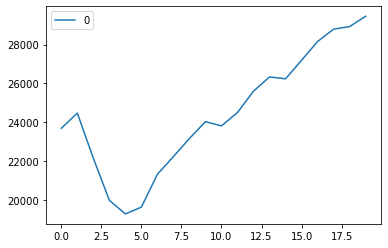

In [31]:
curve.plot()

In [32]:
rmse=[]
model=KNeighborsRegressor(n_neighbors=3)
model.fit(X_train,y_train)
pred=model.predict(X_test)
error=sqrt(mean_squared_error(y_test,pred))
rmse.append(error)
print('RMSE value for k=3 is- ',error)

RMSE value for k=3 is-  22146.50273423752


In [33]:
pred=model.predict(X_test)
pred

array([140049.60333333,  91421.39666667, 183166.72      , 157646.34      ,
       139759.13      ,  59173.01333333, 166585.47666667, 101407.24666667,
        84061.32      ,  63372.51333333])

In [34]:
r2_score(y_test,pred)

0.7643394967655288